# **Red Neuronal Artificial: PERCEPTRÓN**
```
Versión   : 1.5, Para uso educativo
Autor     : Luis Beltran Palma Ttito
Lugar     : Cusco, Perú, 2024.
Proposito : Implementación de perceptrón
Problema  : Insuficiencia cardiaca.
```

#**Breve marco teórico**
**Definición del perceptrón:**

El perceptrón es una red neuronal de aprendizaje supervisado que consiste en un única neurona, donde se realiza una combinación lineal de las entradas ponderadas por los pesos y aplica una función de activación para producir una salida binaria. El perceptrón es capaz de aprender a clasificar datos en dos categorías distintas, ajustando los pesos y el sesgo mediante la retropropagación del error.

**Proceso de entrenamiento del perceptrón:**

El proceso de entrenamiento del perceptrón implica la presentación de datos de entrenamiento de forma iterativa. Para cada muestra de entrenamiento, se realiza la propagación hacia adelante para calcular la salida del perceptrón. Luego, se calcula el error entre la salida obtenida y la salida deseada. Este error se utiliza para ajustar los pesos y el sesgo mediante la retropropagación del error y la actualización de los parámetros. El proceso de entrenamiento continúa iterando sobre los datos de entrenamiento durante un número determinado de épocas, refinando gradualmente los pesos y el sesgo del perceptrón para mejorar su capacidad de clasificación.

# **Descripción del dataset de Insuficiencia Cardíaca**

El conjunto de datos de insuficiencia cardíaca es un conjunto de información recopilada y organizada que contiene datos clínicos de pacientes que han sido diagnosticados con insuficiencia cardíaca. Estos datos se utilizan para realizar análisis, investigaciones y aplicar técnicas de aprendizaje automático para comprender mejor la enfermedad y mejorar la atención médica.

El conjunto de datos de insuficiencia cardíaca contiene una variedad de variables o características que describen diferentes aspectos del paciente y su condición cardíaca. Este conjunto de datos incluye:

**1. Age (Edad):** Representa la edad del paciente en años.

**2. Anaemia (Anemia):** Indica si el paciente sufre de anemia o no.

**3. Creatinine Phosphokinase (Creatinina Fosfoquinasa):** Nivel enzimático en la sangre que indica daño muscular.

**4. Diabetes:** Indica si el paciente tiene diabetes o no.

**5. Ejection Fraction (Fracción de Eyección):** Porcentaje de sangre que el corazón expulsa en cada contracción.

**6. High Blood Pressure (Presión Arterial Alta):** Indica si el paciente tiene presión arterial alta o no.

**7. Platelets (Plaquetas):** Número de plaquetas en la sangre del paciente.

**8. Serum Creatinine (Creatinina en suero):** Indicador de la función renal.

**9. Serum Sodium (Sodio en suero):** Nivel de sodio en la sangre del paciente.

**10. Sex (Sexo):** Indica el sexo del paciente.

**11. Smoking (Fumador):** Indica si el paciente es fumador o no.

**12. Time (Tiempo):** Tiempo de seguimiento en días para cada paciente.

**13. DEATH_EVENT (Evento de Fallecimiento):** Variable objetivo que indica
si el paciente ha fallecido o no durante el período de seguimiento.


# **1. IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# **2. IMPLEMENTACIÓN DE PERCEPTRÓN**



In [ ]:
class Perceptron:
  # Constructor de la clase
  def __init__(self, N):
    # Inicialización de los pesos aleatorios
    self.W = np.random.randn(N)
    # Inicialización del sesgo (umbral) aleatorio
    self.Teta = random.random()
    # Guardar el número de características (atributos)
    self.N = N
    # Inicialización de las métricas de evaluación del modelo (matriz de confusión)
    self.MC = {'VP':0,'VN':0,'FP':0,'FN':0}

  # Función de activación sigmoide
  def ActivacionSigmoide(self,X):
    return 1/(1 + math.exp(-X))

  # Función de activación escalón
  def ActivacionEscalon(self,X):
    if (X < 0.5):
        return 0
    else:
        return 1

  # Predicción de perceptrón
  def Prediccion(self, Entradas):
    # Cálculo de la combinación lineal de las entradas y los pesos, y ajuste por el sesgo
    WX = self.W.dot(Entradas) - self.Teta
    # Aplicación de la función de activación sigmoide a la combinación lineal
    self.Y = self.ActivacionSigmoide(WX)
    # Almacenamiento de las entradas para uso posterior
    self.X = Entradas
    # Aplicación de la función de activación escalón a la salida
    return self.ActivacionEscalon(self.Y)

  # Propagación del perceptrón
  def Propagacion(self, Entradas):
    # Cálculo de la combinación lineal de las entradas y los pesos, y ajuste por el sesgo
    WX = self.W.dot(Entradas) - self.Teta
    # Aplicación de la función de activación sigmoide a la combinación lineal
    self.Y = self.ActivacionSigmoide(WX)
    # Almacenamiento de las entradas para uso posterior
    self.X = Entradas
    # Devolución de la salida
    return self.Y

  # Retropropagación
  def RetroPropagacion(self, Alfa, D):
    # Actualización de los pesos del perceptrón para cada característica de entrada
    for i in range(0, self.N):
        self.W[i] = self.W[i] + Alfa * (D - self.Y) * self.X[i]
    # Actualización del sesgo del perceptrón
    self.Teta = self.Teta - Alfa * (D - self.Y)

  # Entrenamiento de perceptrón
  def Entrenar(self, datos, Epocas, Alfa):
    # Bucle principal para el entrenamiento durante un número determinado de épocas
    for k in range(Epocas):
      # Bucle interno para recorrer los datos de entrenamiento
      for i in range(len(datos)):
        # Propagación de la entrada a través del perceptrón
        self.Propagacion(datos[i, 0:self.N])
        # Retropropagación del error y actualización de los pesos y sesgo
        self.RetroPropagacion(Alfa, datos[i, self.N])
    # Devolución de los pesos y el sesgo entrenados
    return self.W, self.Teta

  # Test del modelo, retorna la matriz de confusión
  def Test(self, datos):
    self.MC = {'VP':0,'VN':0,'FP':0,'FN':0}
    for dato in datos:
      # Realizar la predicción
      Pred = self.Prediccion(dato[0:self.N])
      # Comparar la predicción con la etiqueta real y actualizar matriz de confusión
      if ((dato[self.N] == Pred) and dato[self.N] == 1):
          self.MC['VP'] = self.MC['VP'] + 1
      elif((dato[self.N] == Pred) and dato[self.N] == 0):
          self.MC['VN'] = self.MC['VN'] + 1
      elif((Pred == 1) and (dato[self.N] == 0)):
          self.MC['FP'] = self.MC['FP'] + 1
      elif((Pred == 0) and (dato[self.N] == 1)):
          self.MC['FN'] = self.MC['FN'] + 1
    # Devolución de la matriz de confusión
    return self.MC

  # Cálculo de la exactitud del modelo
  def Exactitud(self):
      return (self.MC['VP']+self.MC['VN'])/(self.MC['VP']+self.MC['VN']+self.MC['FP']+self.MC['FN'])


# **3. IMPORTACIÓN DE DATOS**

In [ ]:
datos = pd.read_csv("cardiaco_neurona.csv", sep=';')
datos.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **4. DISTRIBUCIÓN DE CLASES**

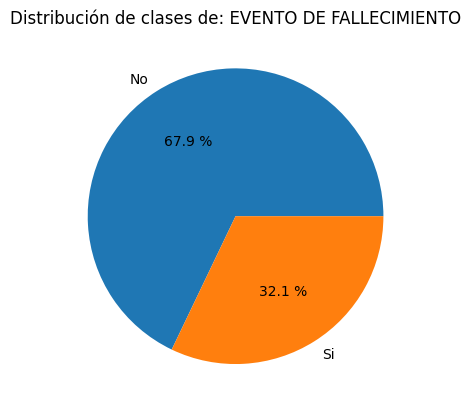

In [ ]:
# vista gráfica de la distribución de clases
distribucion = datos.groupby('DEATH_EVENT').size()
plt.pie(distribucion, labels = ['No','Si'], autopct="%0.1f %%")
plt.title('Distribución de clases de: EVENTO DE FALLECIMIENTO')
plt.show()

# **5. NORMALIZACIÓN DE DATOS**

In [ ]:
# Transformación por amplitud [0..1]
def Normalizacion_Amplitud(atributo):
    return (atributo - atributo.min())/(atributo.max() - atributo.min())

# Normaliza todos los atributos del dataframe
def NormalizarTodo(datos):
    for col in datos.columns:
        datos[col] = Normalizacion_Amplitud(datos[col])
    return datos

In [ ]:
datos = NormalizarTodo(datos)
datos.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


# **6. SEPARACIÓN DE DATOS PARA PRUEBA Y ENTRENAMIENTO**

In [ ]:
# Separa datos para entrenamiento y test
def Separacion(datos, porcentaje_test = 0.25):
    dat_test = datos.sample(frac = porcentaje_test)
    dat_train = datos.drop(dat_test.index)
    return dat_train, dat_test

In [ ]:
train, test = Separacion(datos, 0.3)

# **7. ENTRENAMIENTO DE PERCEPTRÓN**

In [ ]:
# El último atributo debe ser de SALIDA
# datos.shape[1]-1:  cantidad de atributos de entrada
RNA = Perceptron(datos.shape[1]-1)
Epocas = 1500
CoefAprend = 0.01
W, T = RNA.Entrenar(train.values, Epocas, CoefAprend)
print('Pesos: ', W)
print('Sesgo (teta): ', T)

Pesos:  [ 3.50017509  0.30689458  1.69588805  0.25203679 -5.95222287 -0.09792592
 -0.42038074  3.95318425 -4.49093752 -0.69392986  0.55598899 -5.97468476]
Sesgo (teta):  -4.8941102356315564


# **8. TEST DE PERCEPTRÓN**

In [ ]:
# Test con datos de prueba
RNA.Test(test.values)

{'VP': 24, 'VN': 49, 'FP': 9, 'FN': 8}

In [ ]:
RNA.Exactitud()

0.8111111111111111

#  **9. PREDICCIÓN**

In [ ]:
# Ejemplo de predicción de nuevo valor
RNA.Prediccion([0.56, 0.0,	0.05, 0.0, 0.07, 1.0, 0.28, 0.16, 0.49, 1.0, 0.0, 0.0])

1

# **10. PRÁCTICA**
```
Realizar el entrenamiento de perceptrón para el dataset de:
voz.csv
diabetes.csv
cancer.csv
Experimente cambiando los valores de los hiperparámetros del modelo para mejorar la exactitud.
```